In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import semfunction as sf
import scipy.stats as stats

## Info dataframe

In [16]:
url = r"..\data\cleaned\clean_house.csv"
house = pd.read_csv(url, sep=",")
url = r"..\data\cleaned\clean_app.csv"
app = pd.read_csv(url, sep=",")

In [17]:
house.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,is_belgian
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,0,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,True
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,0,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,True
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,0,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,True
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,0,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,True
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,0,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,True


In [106]:
house["open_fire"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13189 entries, 0 to 13188
Series name: open_fire
Non-Null Count  Dtype
--------------  -----
13189 non-null  int64
dtypes: int64(1)
memory usage: 103.2 KB


In [80]:
house.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            1873
GOOD              4757
JUST_RENOVATED     523
TO_BE_DONE_UP     1269
TO_RENOVATE       1912
TO_RESTORE         102
Name: state_of_building, dtype: int64

In [18]:
app.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,open_fire,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,is_belgian
0,11141961,sint-joost-ten-node,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP,True
1,11158977,elsene,1050,50.832733,4.364130,APARTMENT,APARTMENT,325000.0,BUY_REGULAR,NaN,...,0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,True
2,11072105,brussel,1040,50.843509,4.370263,APARTMENT,APARTMENT,650000.0,BUY_REGULAR,NaN,...,0,NaN,NaN,NaN,NaN,NaN,3.0,0.0,AS_NEW,True
3,11129303,de haan,8420,51.257157,2.999425,APARTMENT,APARTMENT,119000.0,BUY_REGULAR,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,True
4,11155131,vorselaar,2290,51.202692,4.768350,APARTMENT,APARTMENT,249000.0,BUY_REGULAR,NaN,...,1,1.0,NaN,NaN,NaN,NaN,3.0,NaN,GOOD,True


In [81]:
app.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            2691
GOOD              3380
JUST_RENOVATED     520
TO_BE_DONE_UP      515
TO_RENOVATE        317
TO_RESTORE          22
Name: state_of_building, dtype: int64

The Question: What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Anwser: The price exhibits a significant correlation with the living area and terrace area. This correlations can be attributed to the logical influence of price on the living space of a house. The price has no correlation with number of facades, surface of goods and number of rooms. The reason price and living area are better correlated is because if the house is bigger the price goes up. It also importend to note in which state the house is.


The Question: How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?

Anwser: There exist correlations beyond just price, notably in the linear relationships between living area and terrace space and garden area and the overall land size(surface area). As the living area within a house expands, so does the corresponding terrace area. The garden area also expands.

## Houses

1178


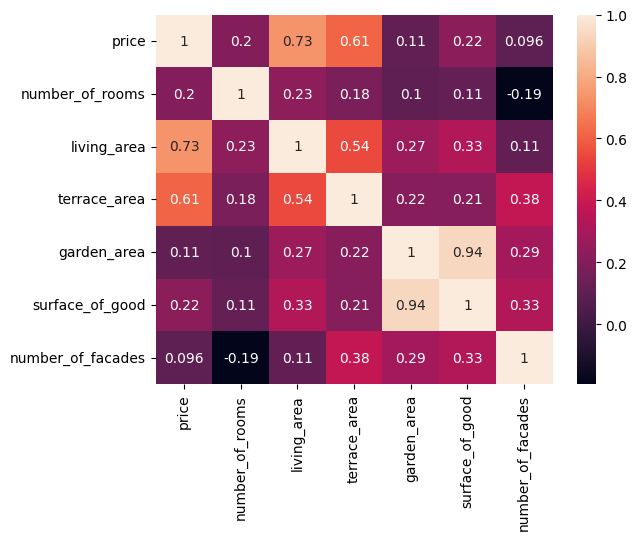

In [120]:

ndf = sf.filter_cities(house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
fdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]
print(fdf.shape[0])
sf.heatmap(fdf)

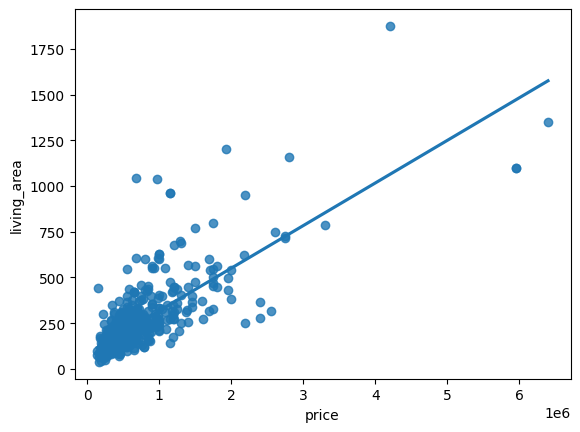

In [65]:
sf.regplot(fdf, "price", "living_area")

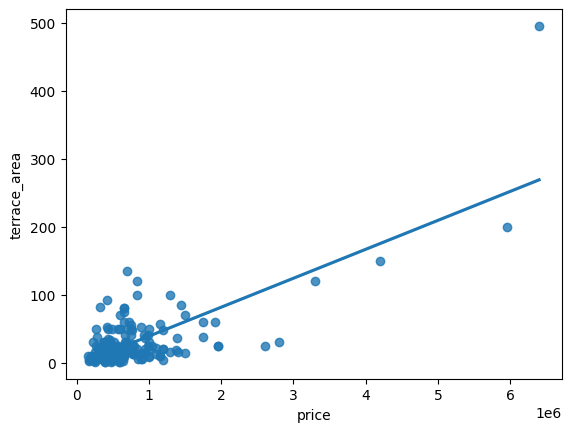

In [66]:
sf.regplot(fdf, "price", "terrace_area")

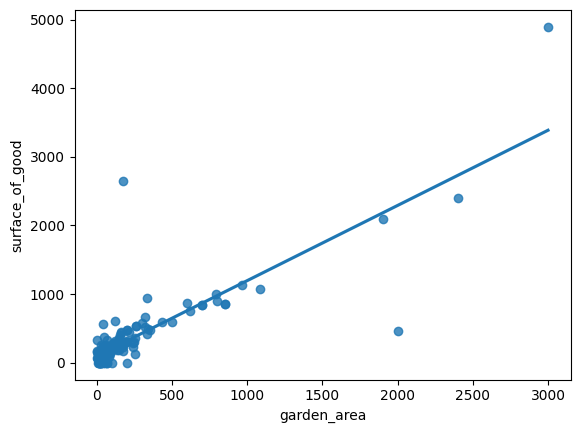

In [68]:
sf.regplot(fdf, "garden_area", "surface_of_good")

## Appartements

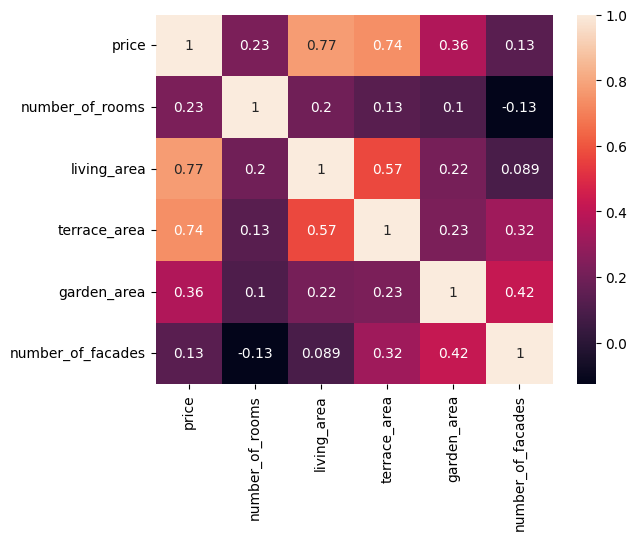

In [69]:
andf = sf.filter_cities(app, "gent", "brussel", "brugge", "leuven", "antwerpen")
afdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "number_of_facades"]]
sf.heatmap(afdf)

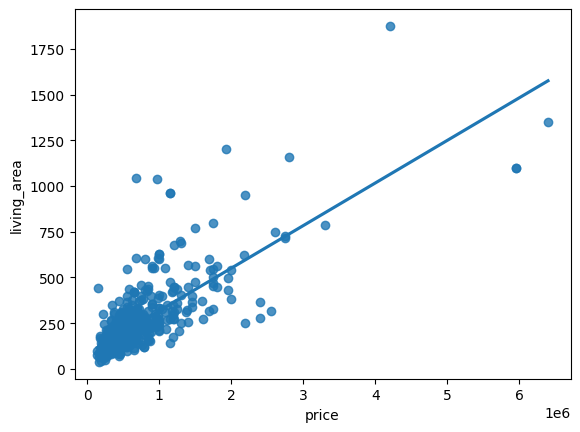

In [70]:
sf.regplot(afdf, "price", "living_area")

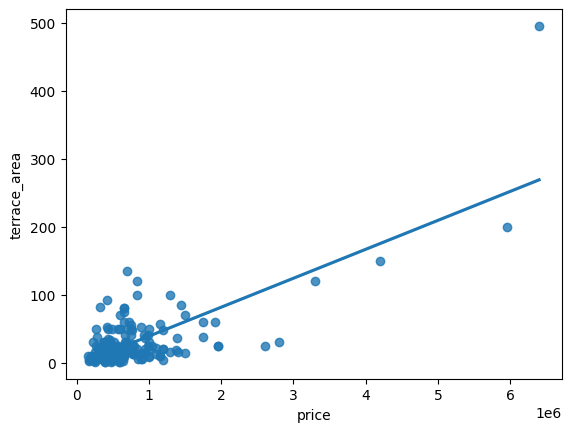

In [71]:
sf.regplot(afdf, "price", "terrace_area")

## State of building correlation

In [137]:
house.groupby("state_of_building")["state_of_building"].count()
state_of_building_mapping = {"AS_NEW":6, "GOOD":5, "JUST_RENOVATED":4, "TO_BE_DONE_UP":3, "TO_RENOVATE":2, "TO_RESTORE":1}
state_house = house
state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)
state_house.head(5)

C:\Users\semde\AppData\Local\Temp\ipykernel_19848\3684524679.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)


,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,is_belgian,values_state_building
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,True,5.0
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,True,5.0
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,True,6.0
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,1,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,True,6.0
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,True,5.0


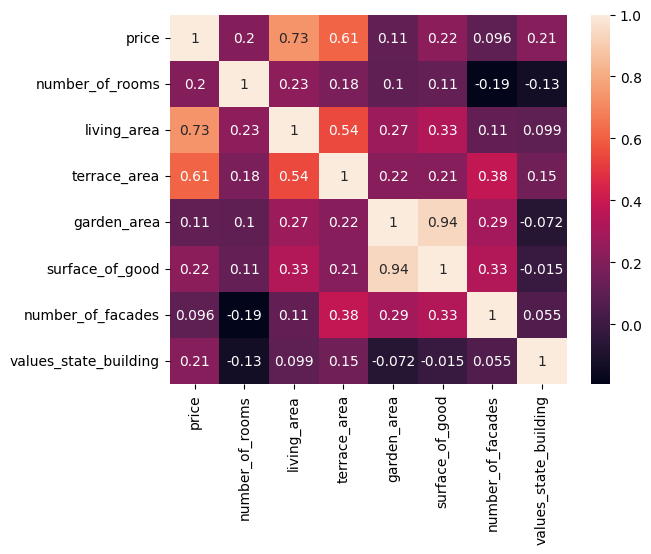

In [138]:
state = sf.filter_cities(state_house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
nstate = state[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades", "values_state_building"]]
sf.heatmap(nstate)